# Forecast Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
##importing the required libraries for Analysis

import pandas as pd
import numpy as np
from numpy import sqrt
from pandas import Grouper
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
##Loading the dataset
df = pd.read_excel('Airlines+Data.xlsx',header=0,parse_dates=True)

In [3]:
df.head(20)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [6]:
df.set_index('Month',inplace=True)
## making the month column as index

In [7]:
df.isnull().sum()

Passengers    0
dtype: int64

In [8]:
df.duplicated().sum()

16

In [9]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 1995-01-01 to 2002-11-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


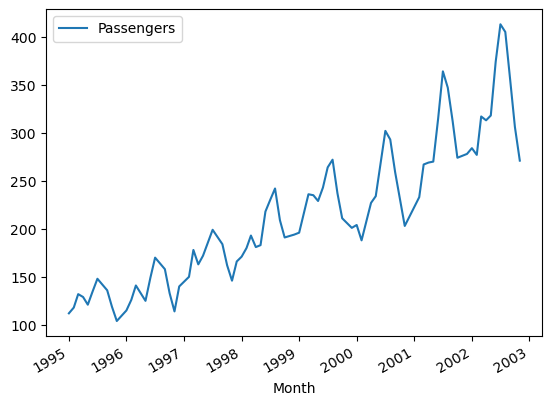

In [10]:
## Visualization of Data Checking the line plot,Histogram and Density Plots,create a density plot,
## Box and Whisker Plots by Interval,Lag Plot, Autocorrelation Plot
df.plot()
plt.show()

In [11]:
## here we can say that the trend is upward and the sessionality is multiplicative

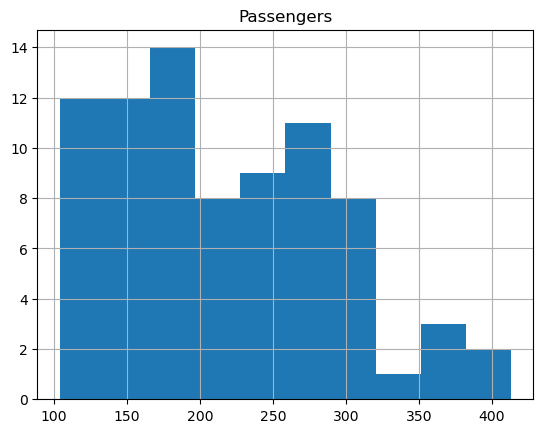

In [12]:
##Histogram and Density Plots

df.hist()
plt.show()

In [13]:
# Data is not normally distributed and tail is towards right

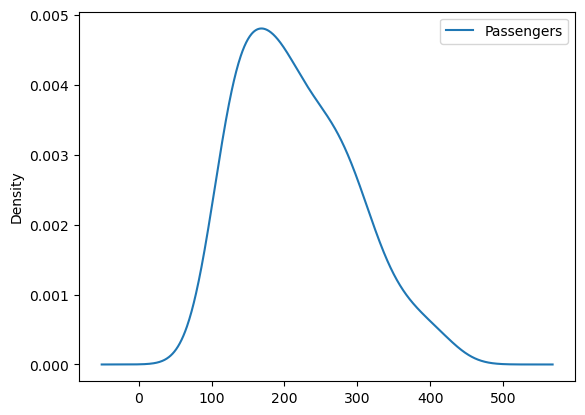

In [14]:
# create a density plot
df.plot(kind='kde')
plt.show()

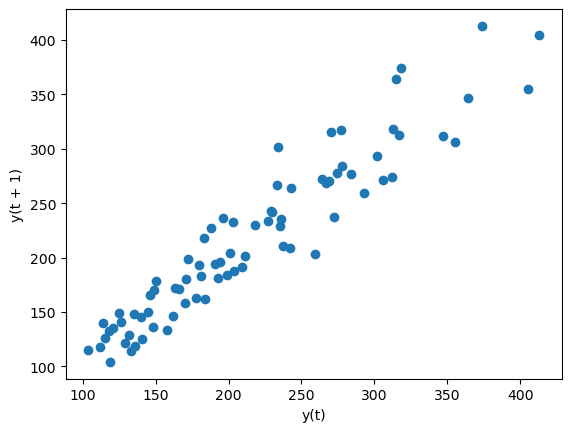

In [15]:
##Lag_plot
lag_plot(df)
plt.show()

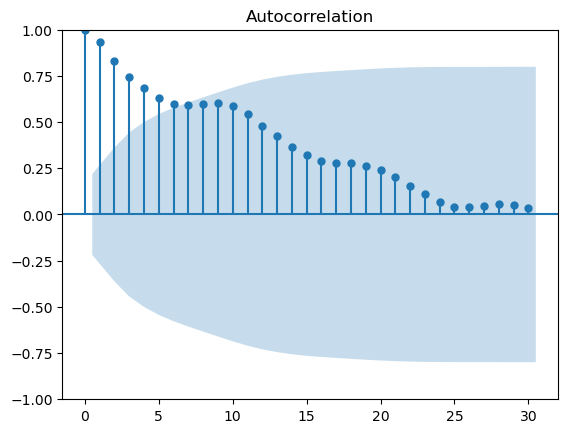

In [16]:
#Autocorrelation Plot

tsa_plots.plot_acf(df,lags=30)
plt.show()

In [17]:
# ACF plot curve is gradually decreasing.

In [18]:
#UpSampling:
upsampled = df.resample('M').mean()
print(upsampled.head(10))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0


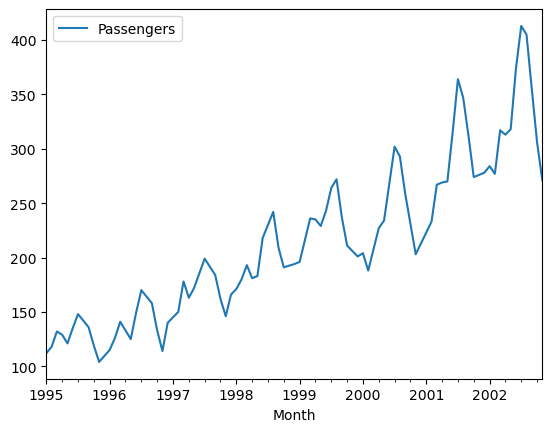

In [19]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(10))
interpolated.plot()
plt.show()

In [20]:
# Train Test Split:
Train = interpolated.head(81)
Test = interpolated.tail(14)

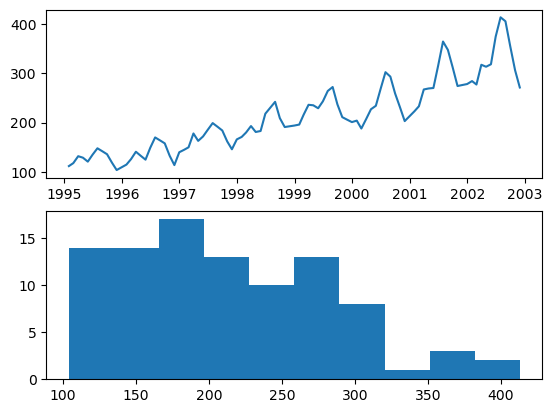

In [21]:
#Tranformations:
plt.subplot(211)
plt.plot(interpolated)
plt.subplot(212)
plt.hist(interpolated)
plt.show()

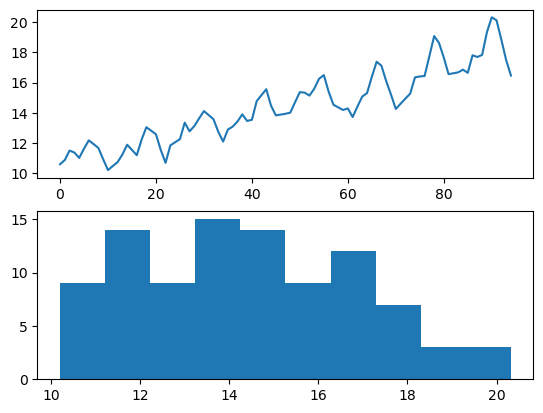

In [22]:
#Square Root Transform
dataframe = DataFrame(interpolated.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

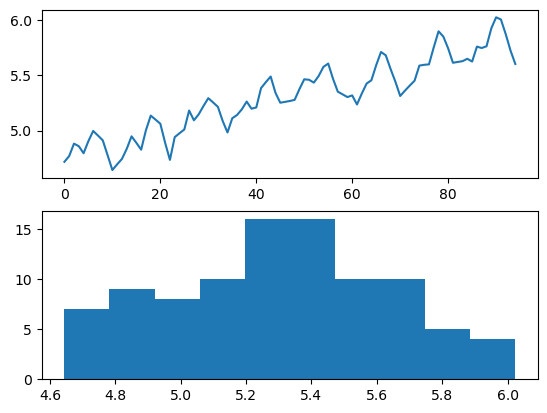

In [23]:
#Log Transform
dataframe = DataFrame(interpolated.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.log(dataframe['Passengers'])
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [24]:
# Now the data is more normally distributed.

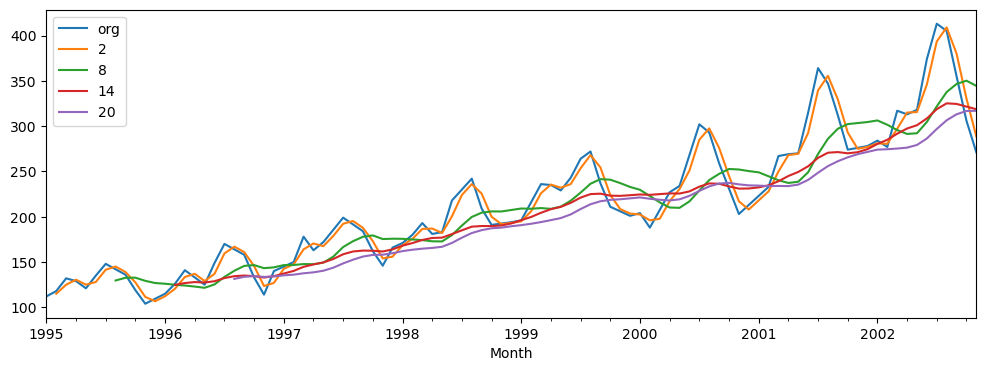

In [25]:
#Moving Average:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

In [26]:
# Moving average of previous 2 months is better than 8,12 and 20:

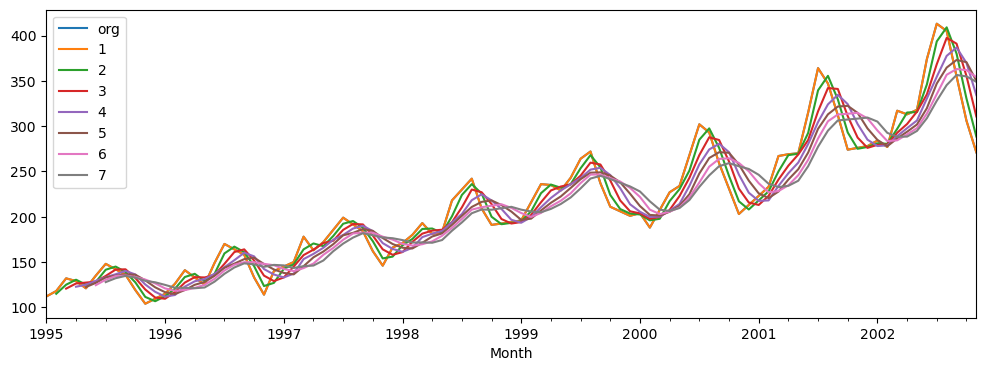

In [27]:
#Moving Average:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(1,8,1):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

In [28]:
# Seems like 2 is still better.
interpolated.Passengers.rolling(2)

Rolling [window=2,center=False,axis=0,method=single]

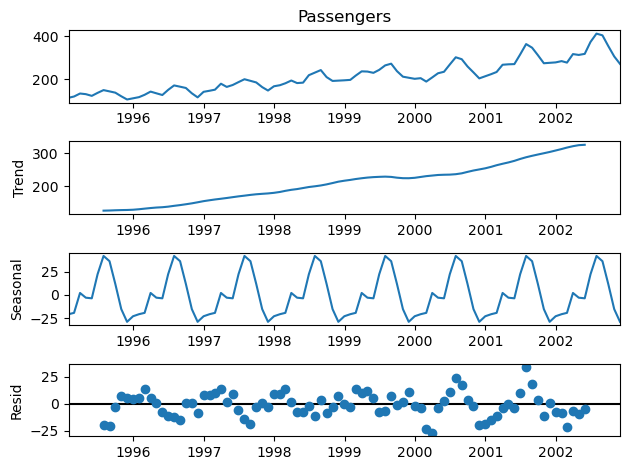

In [29]:
#Time series decomposition plot:
decompose_ts_add = seasonal_decompose(interpolated.Passengers,period=12)  
decompose_ts_add.plot()
plt.show()

In [30]:
# If we consider the scale, trend seems to be additive and moving upwards.
# Seasonality is additive and there is some noise.

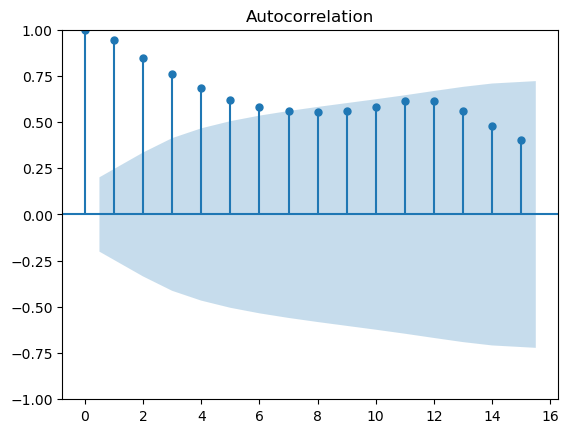

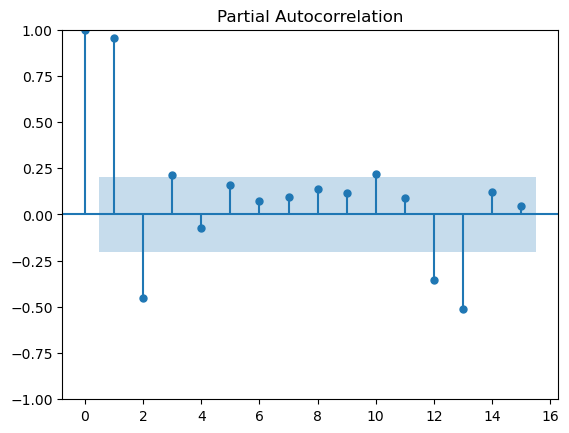

In [31]:
#ACF plots and PACF plots:
tsa_plots.plot_acf(interpolated.Passengers,lags=15)
tsa_plots.plot_pacf(interpolated.Passengers,lags=15)
plt.show()
# there is high corelation between current and previous month's passengers count.

In [32]:
#Evaluation Metric RMSE:
def RMSE(pred,org):
    num = np.sqrt(np.mean((np.array(pred)-np.array(org))**2))
    return num

In [33]:
#Simple Exponential Method:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_simp_exp = RMSE(pred_ses,Test.Passengers)
rmse_simp_exp

51.30698085158876

In [34]:
#Let's try for various smoothing levels and comapare metrics:

In [35]:
for i in np.round(np.arange(0.1,1,0.1),2):
    ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    val = np.round(RMSE(pred_ses,Test.Passengers),3)
    print('RMSE value for smoothning at {} is {} '.format(i,val))

RMSE value for smoothning at 0.1 is 65.78 
RMSE value for smoothning at 0.2 is 51.307 
RMSE value for smoothning at 0.3 is 47.766 
RMSE value for smoothning at 0.4 is 47.598 
RMSE value for smoothning at 0.5 is 47.869 
RMSE value for smoothning at 0.6 is 47.858 
RMSE value for smoothning at 0.7 is 47.659 
RMSE value for smoothning at 0.8 is 47.52 
RMSE value for smoothning at 0.9 is 47.613 


In [36]:
# RMSE value for smoothning at 0.24 is 47.519 which is minimum:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_simp_exp = RMSE(pred_ses,Test.Passengers)
rmse_simp_exp

47.51976921253188

In [37]:
print(Test.Passengers,pred_ses)

Month
2001-10-31    274.0
2001-11-30    276.0
2001-12-31    278.0
2002-01-31    284.0
2002-02-28    277.0
2002-03-31    317.0
2002-04-30    313.0
2002-05-31    318.0
2002-06-30    374.0
2002-07-31    413.0
2002-08-31    405.0
2002-09-30    355.0
2002-10-31    306.0
2002-11-30    271.0
Freq: M, Name: Passengers, dtype: float64 2001-10-31    319.215086
2001-11-30    319.215086
2001-12-31    319.215086
2002-01-31    319.215086
2002-02-28    319.215086
2002-03-31    319.215086
2002-04-30    319.215086
2002-05-31    319.215086
2002-06-30    319.215086
2002-07-31    319.215086
2002-08-31    319.215086
2002-09-30    319.215086
2002-10-31    319.215086
2002-11-30    319.215086
Freq: M, dtype: float64


In [38]:
# Our predicted values are all same for all the test months.

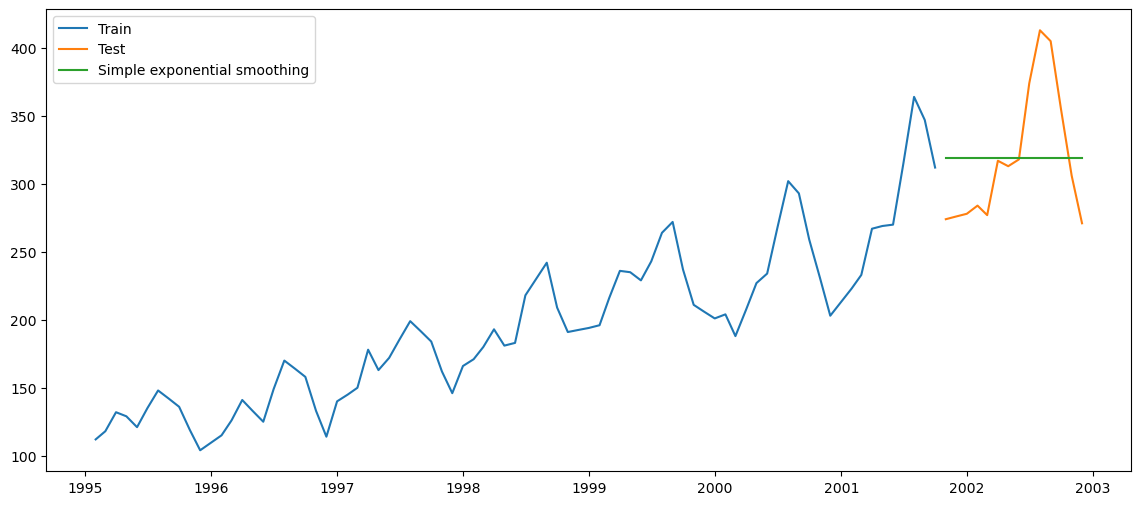

In [39]:
plt.figure(figsize=(14,6))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test.Passengers, label='Test')
plt.plot(pred_ses, label='Simple exponential smoothing')
plt.legend(loc='best')
plt.show()

In [40]:
# Holt's method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.1)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_Holt = RMSE(pred_hw,Test.Passengers)
rmse_Holt

42.045542115037115

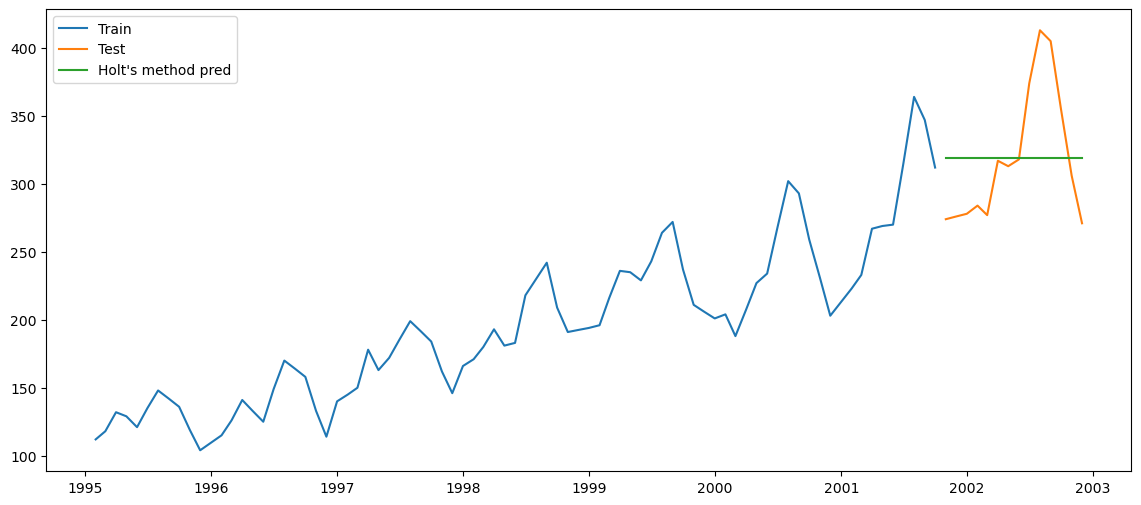

In [41]:
plt.figure(figsize=(14,6))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test.Passengers, label='Test')
plt.plot(pred_ses, label="Holt's method pred")
plt.legend(loc='best')
plt.show()

In [42]:
#Holts winter exponential smoothing with additive seasonality and additive trend:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.11, smoothing_slope=0.2) 
pred_holts_winter = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rsme_Winter =  RMSE(pred_holts_winter,Test.Passengers)
rsme_Winter

12.543030099407355

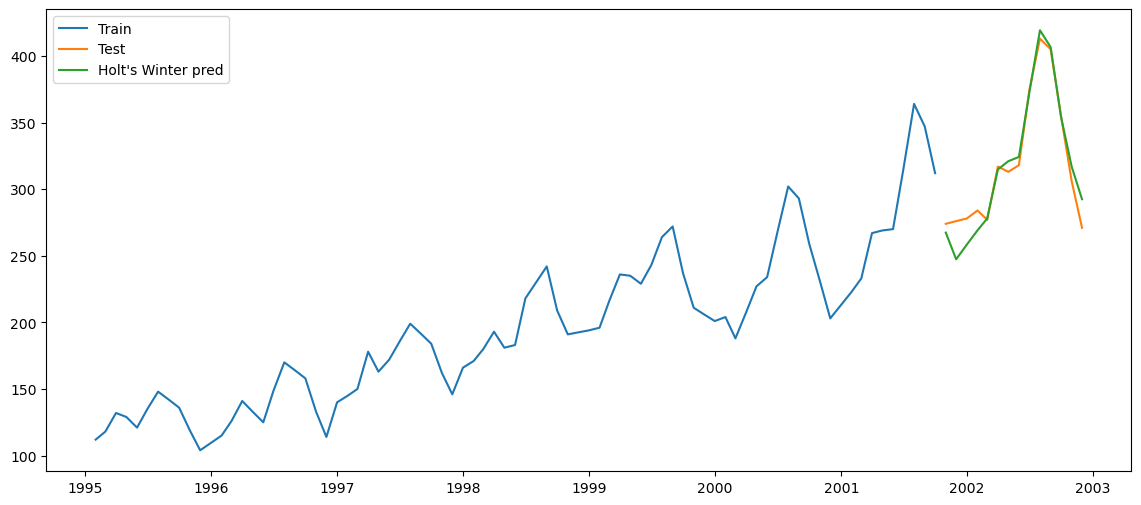

In [43]:
plt.figure(figsize=(14,6))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test.Passengers, label='Test')
plt.plot(pred_holts_winter, label="Holt's Winter pred")
plt.legend(loc='best')
plt.show()

In [44]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
arima_model = ARIMA(Train["Passengers"],order=(1,1,1)).fit()
pred_pas = arima_model.predict(start= Test.index[0],end = Test.index[-1])
rsme_Arima = RMSE(pred_pas,Test.Passengers)
rsme_Arima


48.788501465154255

In [45]:
#Let's girdsearch:
for p in range(0,4):
    for d in range(0,4):
        for q in range(0,4):
            order_set = (p,d,q)
            arima_model = ARIMA(Train["Passengers"],order=order_set).fit()
            pred_pas = arima_model.predict(start= Test.index[0],end = Test.index[-1])
            score = RMSE(pred_pas,Test.Passengers)
            print('RMSE score for order {} is {}'.format(order_set,score))
            
            

RMSE score for order (0, 0, 0) is 132.68364127570263
RMSE score for order (0, 0, 1) is 131.03884389823457
RMSE score for order (0, 0, 2) is 129.75935887289344
RMSE score for order (0, 0, 3) is 129.03015802498408
RMSE score for order (0, 1, 0) is 47.9784177670395
RMSE score for order (0, 1, 1) is 50.1603852494365
RMSE score for order (0, 1, 2) is 48.00951487844408
RMSE score for order (0, 1, 3) is 47.14860740025413
RMSE score for order (0, 2, 0) is 318.3071293129736
RMSE score for order (0, 2, 1) is 45.012986665242614
RMSE score for order (0, 2, 2) is 43.55144589817138
RMSE score for order (0, 2, 3) is 44.485939563162
RMSE score for order (0, 3, 0) is 1243.6428058614647
RMSE score for order (0, 3, 1) is 344.6118724342602
RMSE score for order (0, 3, 2) is 47.52054767969529
RMSE score for order (0, 3, 3) is 43.3802985228723
RMSE score for order (1, 0, 0) is 62.98346014141582
RMSE score for order (1, 0, 1) is 87.62977930397065
RMSE score for order (1, 0, 2) is 78.98084442199703
RMSE score 

In [46]:
#Least one is : RMSE score for order (3, 1, 3) is 36.91718182878383

In [47]:
arima_model = ARIMA(Train["Passengers"],order=(3,1,3)).fit()
pred_pas = arima_model.predict(start= Test.index[0],end = Test.index[-1])
rsme_Arima = RMSE(pred_pas,Test.Passengers)
rsme_Arima

36.91718182878383

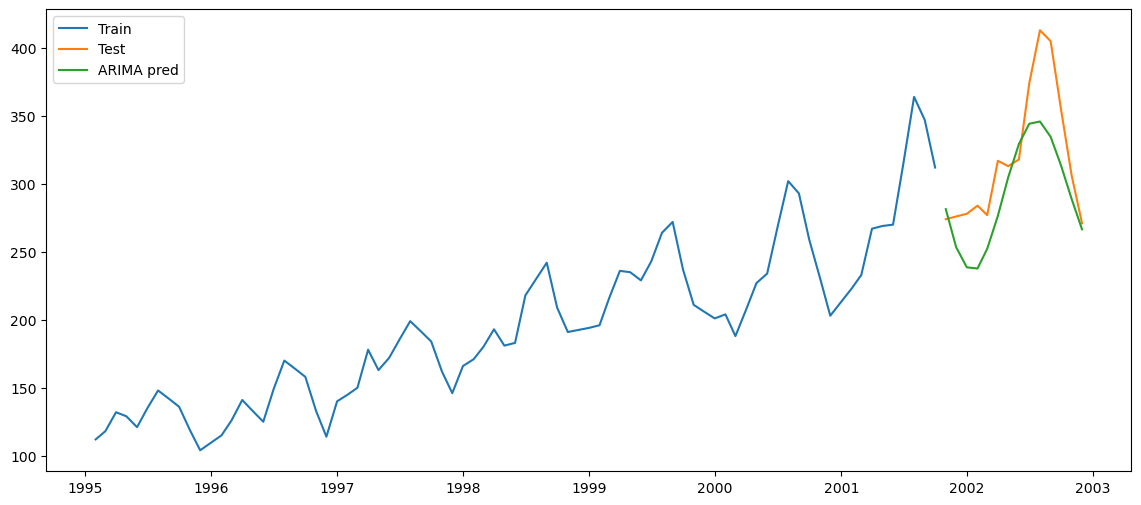

In [48]:
plt.figure(figsize=(14,6))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test.Passengers, label='Test')
plt.plot(pred_pas, label="ARIMA pred")
plt.legend(loc='best')
plt.show()

In [49]:
print(Test.Passengers,pred_pas)

Month
2001-10-31    274.0
2001-11-30    276.0
2001-12-31    278.0
2002-01-31    284.0
2002-02-28    277.0
2002-03-31    317.0
2002-04-30    313.0
2002-05-31    318.0
2002-06-30    374.0
2002-07-31    413.0
2002-08-31    405.0
2002-09-30    355.0
2002-10-31    306.0
2002-11-30    271.0
Freq: M, Name: Passengers, dtype: float64 2001-10-31    281.386956
2001-11-30    253.402513
2001-12-31    238.588673
2002-01-31    237.742031
2002-02-28    252.207609
2002-03-31    276.506913
2002-04-30    304.869460
2002-05-31    329.342814
2002-06-30    344.244332
2002-07-31    345.894495
2002-08-31    334.597882
2002-09-30    313.624096
2002-10-31    288.796448
2002-11-30    266.530302
Freq: M, Name: predicted_mean, dtype: float64


In [50]:
upsampled = df.resample('M').mean()
interpolated = upsampled.interpolate(method='linear') 

## Let's try other model based methods:

In [51]:
interpolated.reset_index(inplace=True)
interpolated['t'] = 1
for i,row in interpolated.iterrows():
    interpolated['t'].iloc[i] = i+1
interpolated.head()

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5


In [52]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column which is squaring t
interpolated.head()

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25


In [53]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # year extraction
interpolated.head()

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995


In [54]:
month = pd.get_dummies(interpolated.month)
month.head()
# further creating dummy variables for each month and putting in new df : month

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
#Changing Sequence:
months = month[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
months.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
Airlines = pd.concat([interpolated,months],axis=1)
Airlines.head()


,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])
Airlines.head()
#adding log of passengers count.

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791


In [58]:
pivot = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
#Creating a pivot table of month wise , year wise passengers count.
pivot

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,142.0,109.5,118,112,148,135.0,132.0,121,104.0,119,136
1996,133,164.0,140.0,126,115,170,149.0,141.0,125,114.0,133,158
1997,163,191.5,166.0,150,145,199,185.5,178.0,172,146.0,162,184
1998,181,242.0,194.0,180,171,230,218.0,193.0,183,192.5,191,209
1999,235,272.0,201.0,216,196,264,243.0,236.0,229,206.0,211,237
2000,227,293.0,213.0,188,204,302,268.0,207.5,234,203.0,231,259
2001,269,347.0,278.0,233,223,364,315.0,267.0,270,276.0,274,312
2002,313,405.0,0.0,277,284,413,374.0,317.0,318,271.0,306,355


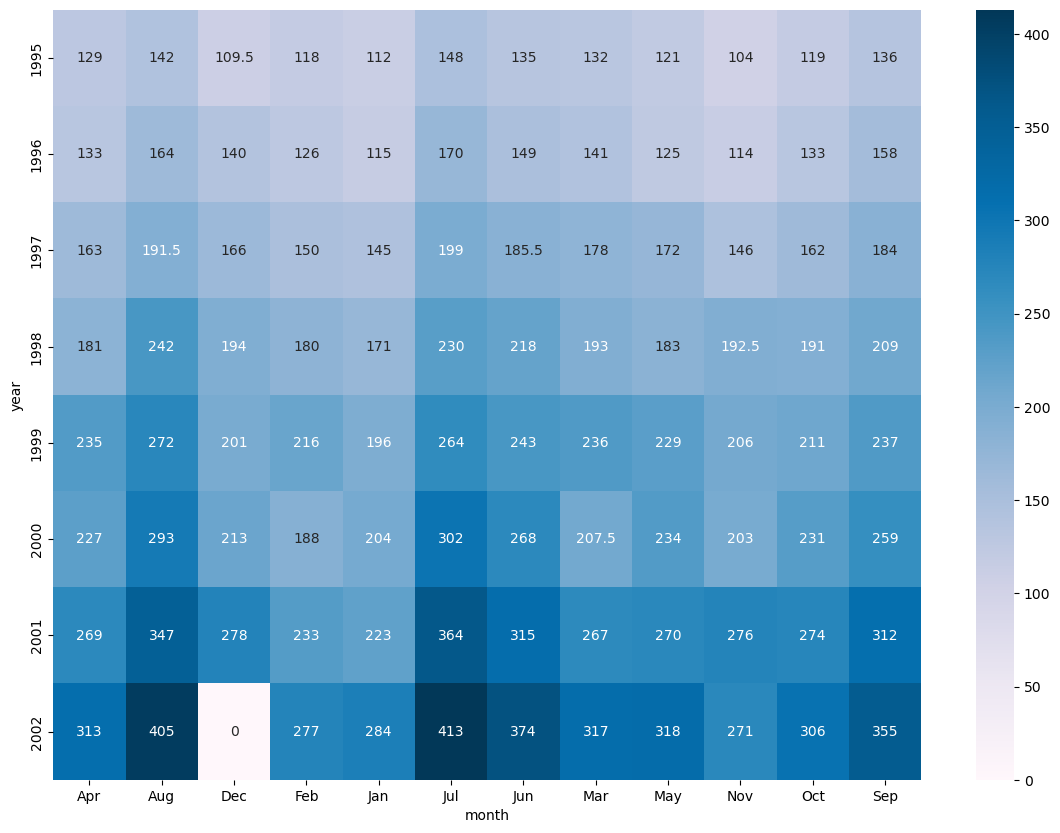

In [59]:
plt.figure(figsize=(14,10))
pivot = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(pivot,annot=True,cmap='PuBu',fmt = 'g')
plt.show()


In [60]:
# We can see year on year rise in passengers count.

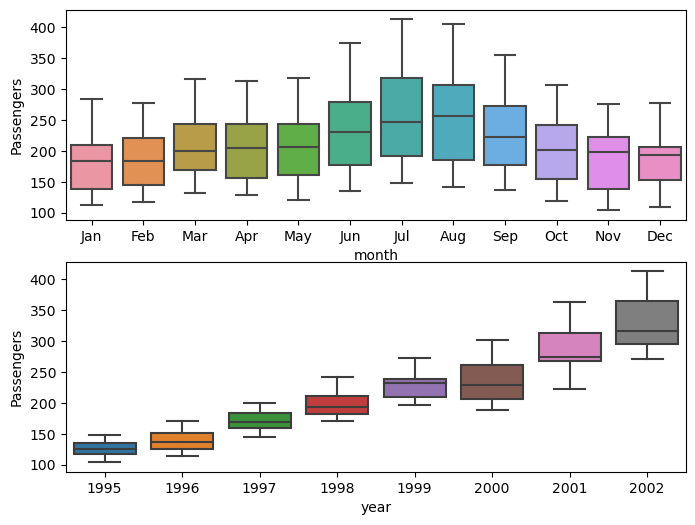

In [61]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)
plt.show()

In [62]:
#month box plot graph shows us that there is increase in no of passengers during the month of July as compared to other months, every year.
#Year plot shows us that there is constant increase in passengers every year with multiplicative trend.

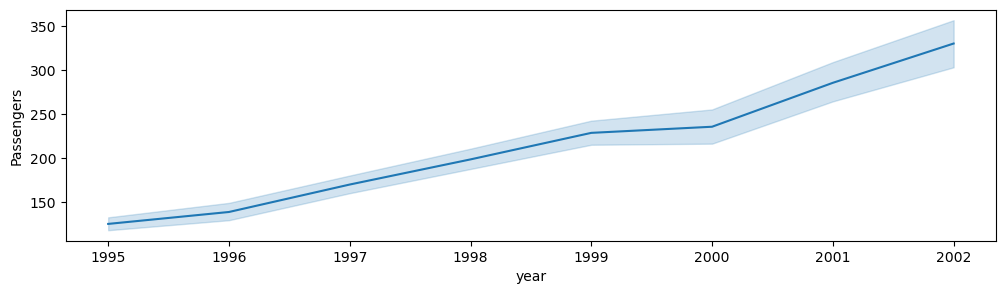

In [63]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)
plt.show()

In [64]:
Train = Airlines.head(81) # training data
Test = Airlines.tail(14) # test Data

In [65]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear= RMSE(pred_linear,Test.Passengers)
rmse_linear

47.87107195088721

In [66]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821815

In [67]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = RMSE(pred_Quad,Test.Passengers)
rmse_Quad

42.709870425152026

In [68]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea =RMSE(pred_add_sea,Test.Passengers)
rmse_add_sea

130.55762388601403

In [69]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = RMSE(pred_add_sea_quad,Test.Passengers)
rmse_add_sea_quad

26.785371911524333

In [70]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.28596175917087

In [71]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

13.188070730263991

In [72]:
#Compareing the results 

data = {"MODEL":pd.Series(["rsme_Arima","rsme_Winter","rmse_Holt","rmse_simp_exp","rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rsme_Arima,rsme_Winter,rmse_Holt,rmse_simp_exp,rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
RSME_TABLE=pd.DataFrame(data)
RSME_TABLE.sort_values(['RMSE_Values'],ascending=True)

,MODEL,RMSE_Values
1,rsme_Winter,12.543030
10,rmse_Mult_add_sea,13.188071
8,rmse_add_sea_quad,26.785372
0,rsme_Arima,36.917182
2,rmse_Holt,42.045542
5,rmse_Exp,42.371796
6,rmse_Quad,42.709870
3,rmse_simp_exp,47.519769
4,rmse_linear,47.871072
7,rmse_add_sea,130.557624


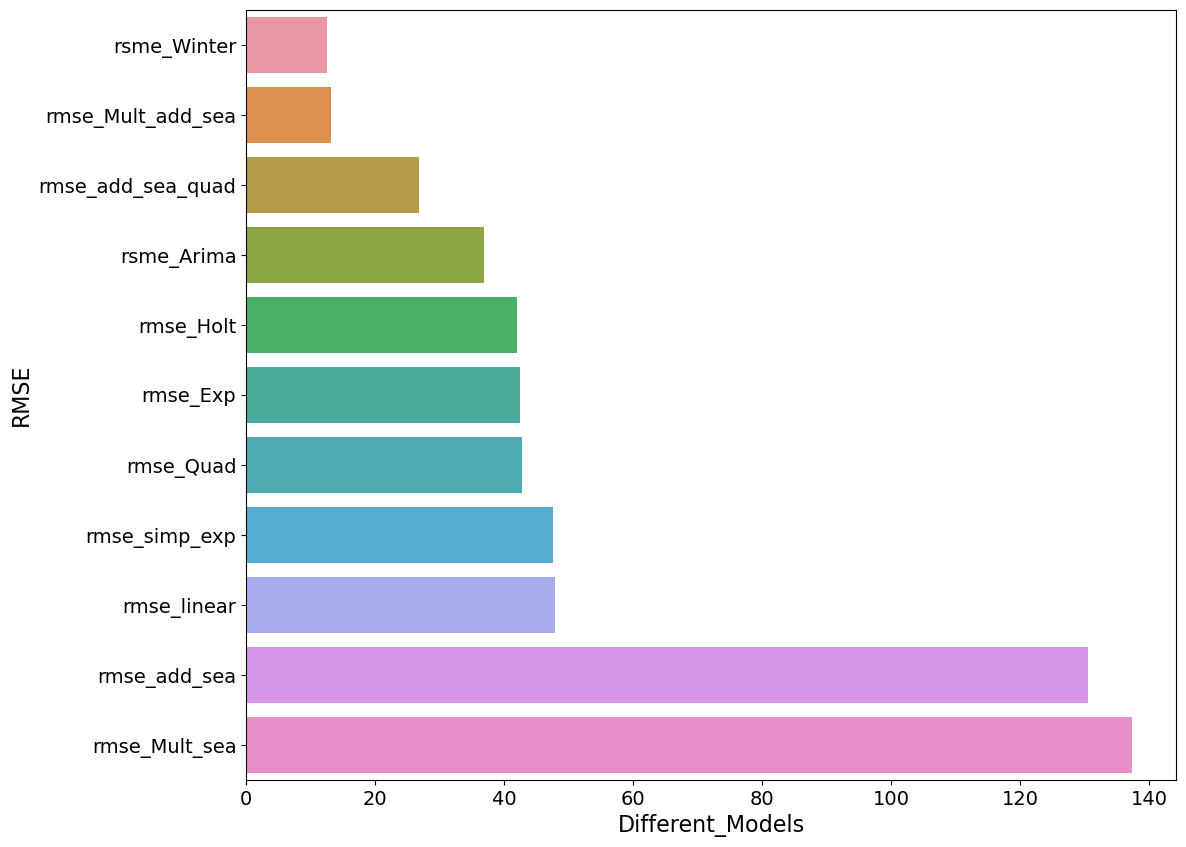

In [73]:
f, axe = plt.subplots(1,1, figsize=(12,10))
sns.barplot(x='RMSE_Values', y='MODEL', data=RSME_TABLE.sort_values(['RMSE_Values'],ascending=True), ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.show()

In [74]:
#Holts winter exponential smoothing with additive seasonality and additive trend:
hwe_model_mul_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.11, smoothing_slope=0.2) 
forcast_holts_winter = hwe_model_mul_add.forecast(steps=12)

<Axes: >

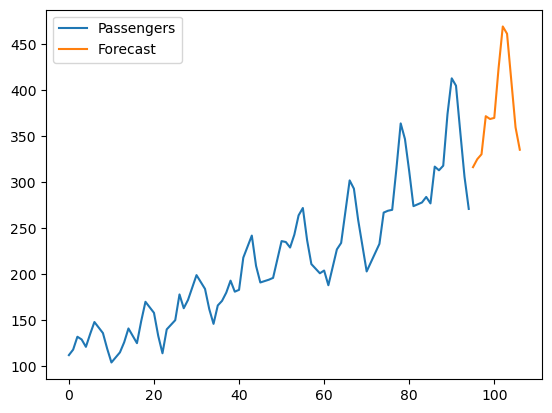

In [75]:
#Let's plot a graph with pred values from Holt's Winter Method :

DF = pd.Series(forcast_holts_winter)
new_df = DF.to_frame(name="Forecast")
forcast_df = pd.concat([interpolated,new_df])

forcast_df[['Passengers','Forecast']].plot()

#### We can see that forecast is in sync with upwards trend and multiplicative seasonality. Hence I'll prefer Holt's Winter method for forecast.